In [1]:
import joblib
import scipy
from assocplots.qqplot import *
# from qmplot import qqplot
import matplotlib.pyplot as plt
import scipy.stats
from scipy.stats import pearsonr
import os
import pandas as pd
import random

In [2]:
def read_pval(path):
    pvals = []
    pvals_perm = []
    genes = []
    with open(path, 'rb') as f:
        data = joblib.load(f)
        for j, d in enumerate(data):
            if d[0] == None:
                continue
            pvals.append(d[0])
            pvals_perm.append(d[1])
            genes.append(str(d[-5]))

    return pvals,pvals_perm,genes

FileNotFoundError: [Errno 2] No such file or directory: '../genes_info_array'

In [5]:
genes_50 = pd.read_csv('/u/home/p/panand2/project-sriram/FastKAST/genes_info_array_50')
directory = "/u/home/p/panand2/project-sriram/FastKAST/gen_architectures_calibration/self/filter4_pheno_all_0.001"

pvals1  = []
pvals_perm1 = []
genes1 = []
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    if os.path.isfile(f):
        pvals,pvals_perm,genes = read_pval(f)
        for pval in pvals:
            pvals1.append(pval)
        for pval in pvals_perm:
            pvals_perm1.append(pval)
        for gene in genes:
            genes1.append(gene)


pvals1 = np.array(pvals1)
pvals_perm1 = np.array(pvals_perm1).flatten()

print(len(pvals1))
# plt.hist(pvals1)

directory = "/u/home/p/panand2/project-sriram/FastKAST/gen_architectures_calibration/self/filter4_pheno_common_0.001"

pvals2  = []
pvals_perm2 = []
genes2 = []
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    if os.path.isfile(f):
        pvals,pvals_perm,genes = read_pval(f)
        for pval in pvals:
            pvals2.append(pval)
        for pval in pvals_perm:
            pvals_perm2.append(pval)
        for gene in genes:
            genes2.append(gene)

pvals2 = np.array(pvals2)
pvals_perm2 = np.array(pvals_perm2).flatten()

print(len(pvals2))
# plt.hist(pvals2)

directory = "/u/home/p/panand2/project-sriram/FastKAST/gen_architectures_calibration/self/filter4_pheno_rare_0.001"

pvals3  = []
pvals_perm3 = []
genes3 = []
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    if os.path.isfile(f):
        pvals,pvals_perm,genes = read_pval(f)
        for pval in pvals:
            pvals3.append(pval)
        for pval in pvals_perm:
            pvals_perm3.append(pval)
        for gene in genes:
            genes3.append(gene)

pvals3 = np.array(pvals3)
pvals_perm3 = np.array(pvals_perm3).flatten()

print(len(pvals3))
# plt.hist(pvals3)

directory = "/u/home/p/panand2/project-sriram/FastKAST/gen_architectures_calibration/self/filter4_pheno_all_1"

pvals4  = []
pvals_perm4 = []
genes4 = []
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    if os.path.isfile(f):
        pvals,pvals_perm,genes = read_pval(f)
        for pval in pvals:
            pvals4.append(pval)
        for pval in pvals_perm:
            pvals_perm4.append(pval)
        for gene in genes:
            genes4.append(gene)

pvals4 = np.array(pvals4)
pvals_perm4 = np.array(pvals_perm4).flatten()

print(len(pvals4))
# plt.hist(pvals4)

9515
9515
9515
9515


/u/home/p/panand2/.local/lib/python3.8/site-packages/assocplots/qqplot.py:69: RuntimeWarning: divide by zero encountered in log10
  plt.plot(-np.log10(q_th[:n_quantiles]), -np.log10(q_data[:n_quantiles]), '.', color=color[j], label=labels[j])
/u/home/p/panand2/.local/lib/python3.8/site-packages/assocplots/qqplot.py:69: RuntimeWarning: divide by zero encountered in log10
  plt.plot(-np.log10(q_th[:n_quantiles]), -np.log10(q_data[:n_quantiles]), '.', color=color[j], label=labels[j])
/u/home/p/panand2/.local/lib/python3.8/site-packages/assocplots/qqplot.py:69: RuntimeWarning: divide by zero encountered in log10
  plt.plot(-np.log10(q_th[:n_quantiles]), -np.log10(q_data[:n_quantiles]), '.', color=color[j], label=labels[j])
/u/home/p/panand2/.local/lib/python3.8/site-packages/assocplots/qqplot.py:78: RuntimeWarning: divide by zero encountered in log10
  plt.fill_between(-np.log10(q_th), -np.log10(q_err[:,0]), -np.log10(q_err[:,1]), color=color[j], alpha=fill_dens[j], label='%1.3f CI'%alpha)

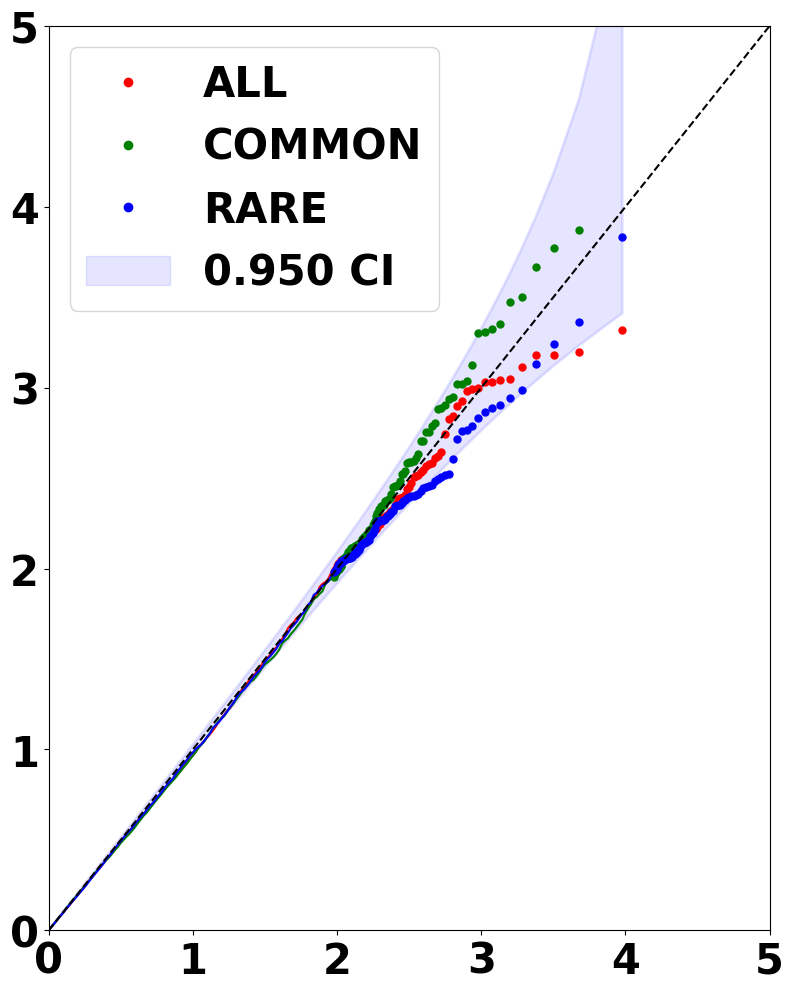

In [6]:
f, ax = plt.subplots(figsize=(8, 10), facecolor="w", edgecolor="k")
qqplot(
        [pvals1, pvals2, pvals3],
           labels=['ALL', 'COMMON', 'RARE'], 
           color=['r', 'g', 'b'],
           fill_dens=[0.1, 0.1, 0.1],
           distribution='beta',
      )

plt.legend(prop={'size': 30, 'weight': 750},markerscale=2.,loc='upper left')
plt.title("")
# plt.ylabel(r"Empirical $-log_{10}{(P)}$", size = 20, )
plt.ylabel("")
# plt.xlabel(r"Theoretical $-log_{10}{(P)}$", size = 20, )
plt.xlabel("")
plt.xlim(0, 5.0)
plt.ylim(0, 5.0)
plt.xticks(fontsize=30, weight=750)
plt.yticks(fontsize=30, weight=750)

# Make the dots thicker
for line in ax.lines:
    line.set_markersize(10)

# Make the lines thicker
for collection in ax.collections:
    collection.set_linewidth(2)

plt.show()